## Visualise the monitor function! :) 

In [2]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import math 
import pandas as pd
font_size=19
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"
import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Roman"
})
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/validate/fewtraj"

def openCfile(file):
    """
    Open the C txt file in order to obtain m_1 matrix of results 
    -----------
    Input
    -----------
    file: txt file
        m_1 file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        m_1 matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


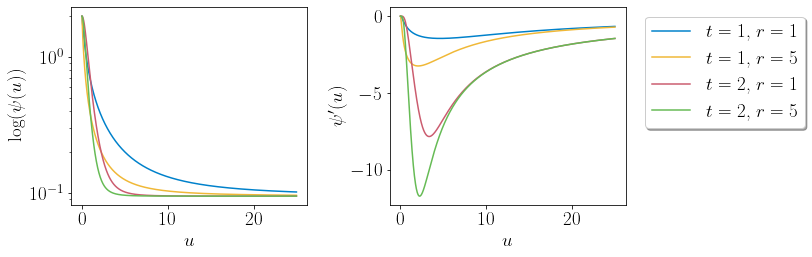

In [3]:
m=0.1
M=2.

def getg(x,t,r):
    xi = np.sqrt(1+m**2*r*x**(2*t))
    sqf=np.sqrt(r*x**(2*t))
    res = xi/(xi/M+sqf)
    return(res)

def getgprime(x,t,r):
    f=r*x**(2*t)
    fp=2*t*r*x**(2*t-1)
    sqf=np.sqrt(f)
    num=-f*fp
    xi = np.sqrt(f*m*m+1)
    den = sqf*xi*pow(xi/M+sqf,2)
    res = num/den
    return(res)

fig, (ax1,ax2)= plt.subplots(1,2,figsize=(14,5))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.8, top=0.8, wspace=0.35, hspace=0.4)

xplot=np.linspace(0.001,25,1000)
ax1.semilogy(xplot,getg(xplot,1,1),color=myblue,label="$t=1$,\n$r=1$")
ax1.semilogy(xplot,getg(xplot,1,5),color=myyellow,label="$t=1$,\n$r=5$")
ax1.semilogy(xplot,getg(xplot,2,1),color=myred,label="$t=2$,\n$r=1$")
ax1.semilogy(xplot,getg(xplot,2,5),color=mygreen,label="$t=2$,$r=5$")
ax2.plot(xplot,getgprime(xplot,1,1),color=myblue,label="$t=1$, $r=1$")
ax2.plot(xplot,getgprime(xplot,1,5),color=myyellow,label="$t=1$, $r=5$")
ax2.plot(xplot,getgprime(xplot,2,1),color=myred,label="$t=2$, $r=1$")
ax2.plot(xplot,getgprime(xplot,2,5),color=mygreen,label="$t=2$, $r=5$")

ax1.set_xlabel("$u$",fontsize=font_size)
ax2.set_xlabel("$u$",fontsize=font_size)

ax1.set_ylabel("$\\log (\\psi(u))$",fontsize=font_size)
ax2.set_ylabel("$\\psi'(u)$",fontsize=font_size)

ax2.legend(loc='upper right',fontsize=font_size,bbox_to_anchor=(1.8, 1.),
          fancybox=True, shadow=True, ncol=1)

# bbox_to_anchor=(.2, 0.2),
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/monitor_func.eps",format="eps")


### Overdamped results 


In [8]:
a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res
dtlist = np.array([np.exp(-4.5), np.exp(-4.21), np.exp(-3.93), np.exp(-3.64), np.exp(-3.36), np.exp(-3.07), np.exp(-2.79), np.exp(-2.5) , np.exp(-2.21), np.exp(-1.93), np.exp(-1.64), np.exp(-1.36), np.exp(-1.07), np.exp(-0.79), np.exp(-0.5)])

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


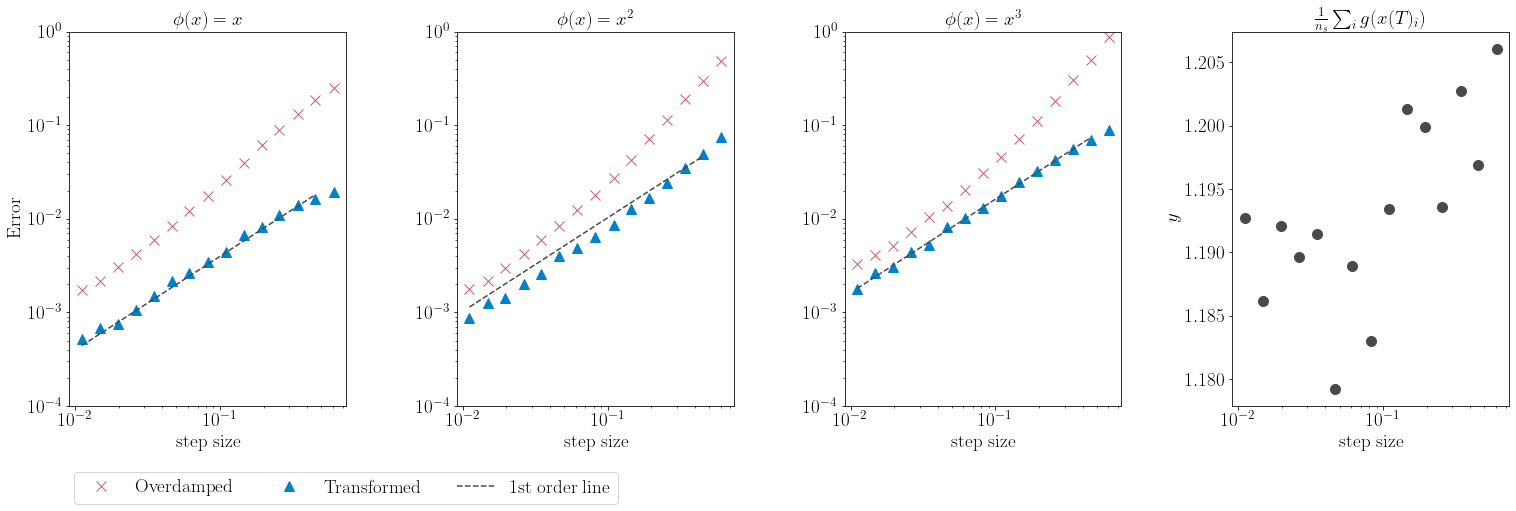

In [19]:
from settings_and_potential_eddie import *
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/"


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile(path+"data_a275/noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"data_a275/noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"data_a275/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile(path+"data_a275/tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path+"data_a275/tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path+"data_a275/tr_moment3.txt"))
mom4_list=np.hstack(openCfile(path+"data_a275/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
# ax4.loglog(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)


# ## mean value of G  
# ###############
lab="Overdamped"
g_mean=[]
j=0
for i in range(int(len(dtlist))):
    file_i=path+"data_a275/vec_gi="+str(i)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    g_mean.append(np.mean(g_vals_i))

# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

## G mean 
##########
ax4.semilogx(xm,g_mean,"o",markersize=mksize,color=myblack)
ax1.legend(fontsize=font_size,ncol=4,loc="upper center",bbox_to_anchor=(1, -0.15))

# fig.savefig("figures/moments_logplot_a275.eps")
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a275.eps",format="eps")

fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/moments_logplot_a275.pdf",format="pdf")
